## Import Data and Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from kmodes.kmodes import KModes
import pylab as pl 

In [3]:
# Import Hospital General Information Dataframe 
path =  r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\U.S. Hospitals'
hospital_general_information = pd.read_csv(os.path.join(path, 'Data','Prepared Data', 'Hospital_General_Information_Clean.csv'), index_col = False)

In [4]:
hospital_general_information 

,Unnamed: 0,index,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,...,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,...,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,1,1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,...,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
2,2,2,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,...,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL 35801\n"
3,3,3,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,9072123675,...,NaN,Below the National average,NaN,Below the National average,NaN,Below the National average,NaN,Same as the National average,NaN,"BOX 196604\nANCHORAGE, AK 99508\n"
4,4,4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,...,NaN,Below the National average,NaN,Below the National average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"PO BOX 287\nBETHEL, AK 99559\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,4813,4813,501333,KITTITAS VALLEY COMMUNITY HOSPITAL,603 SOUTH CHESTNUT,ELLENSBURG,WA,98926,KITTITAS,5099629841,...,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"603 SOUTH CHESTNUT\nELLENSBURG, WA 98926\n(46...."
4814,4814,4814,450827,KELL WEST REGIONAL HOSPITAL,5402 KELL WEST BOULEVARD,WICHITA FALLS,TX,76310,WICHITA,9406925888,...,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"5402 KELL WEST BOULEVARD\nWICHITA FALLS, TX 76..."
4815,4815,4815,501310,NEWPORT COMMUNITY HOSPITAL,714 WEST PINE STREET,NEWPORT,WA,99156,PEND OREILLE,5094472441,...,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"714 WEST PINE STREET\nNEWPORT, WA 99156\n(48.1..."
4816,4816,4816,670107,BAYLOR EMERGENCY MEDICAL CENTER,12500 SOUTH FREEWAY SUITE 100,BURLESON,TX,76028,JOHNSON,2142946250,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,"12500 SOUTH FREEWAY SUITE 100\nBURLESON, TX 76..."


In [5]:
# Remove additional index columns
hospital_general_information_new = hospital_general_information.drop('Unnamed: 0', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('index', axis = 1)

In [6]:
hospital_general_information_new

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_national_comparison_footnote,patient_experience_national_comparison,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison,efficient_use_of_medical_imaging_national_comparison_footnote,location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
2,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL 35801\n"
3,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,9072123675,Acute Care Hospitals,Voluntary non-profit - Church,...,NaN,Below the National average,NaN,Below the National average,NaN,Below the National average,NaN,Same as the National average,NaN,"BOX 196604\nANCHORAGE, AK 99508\n"
4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Acute Care Hospitals,Tribal,...,NaN,Below the National average,NaN,Below the National average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"PO BOX 287\nBETHEL, AK 99559\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,501333,KITTITAS VALLEY COMMUNITY HOSPITAL,603 SOUTH CHESTNUT,ELLENSBURG,WA,98926,KITTITAS,5099629841,Critical Access Hospitals,Government - Hospital District or Authority,...,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"603 SOUTH CHESTNUT\nELLENSBURG, WA 98926\n(46...."
4814,450827,KELL WEST REGIONAL HOSPITAL,5402 KELL WEST BOULEVARD,WICHITA FALLS,TX,76310,WICHITA,9406925888,Acute Care Hospitals,Proprietary,...,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"5402 KELL WEST BOULEVARD\nWICHITA FALLS, TX 76..."
4815,501310,NEWPORT COMMUNITY HOSPITAL,714 WEST PINE STREET,NEWPORT,WA,99156,PEND OREILLE,5094472441,Critical Access Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"714 WEST PINE STREET\nNEWPORT, WA 99156\n(48.1..."
4816,670107,BAYLOR EMERGENCY MEDICAL CENTER,12500 SOUTH FREEWAY SUITE 100,BURLESON,TX,76028,JOHNSON,2142946250,Acute Care Hospitals,Proprietary,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,"12500 SOUTH FREEWAY SUITE 100\nBURLESON, TX 

In [7]:
# Check for missing values 
hospital_general_information_new.isnull().sum()

provider_id                                                         0
hospital_name                                                       0
address                                                             0
city                                                                0
state                                                               0
zip_code                                                            0
county_name                                                         0
phone_number                                                        0
hospital_type                                                       0
hospital_ownership                                                  0
emergency_services                                                  0
hospital_overall_rating                                          1170
hospital_overall_rating_footnote                                 3476
mortality_national_comparison                                       0
mortality_national_c

In [8]:
# Remove footnote columns 
hospital_general_information_new = hospital_general_information_new.drop('hospital_overall_rating_footnote', axis =1)
hospital_general_information_new = hospital_general_information_new.drop('mortality_national_comparison_footnote', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('safety_of_care_national_comparison_footnote', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('readmission_national_comparison_footnote', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('patient_experience_national_comparison_footnote', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('effectiveness_of_care_national_comparison_footnote', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('timeliness_of_care_national_comparison_footnote', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('efficient_use_of_medical_imaging_national_comparison_footnote', axis = 1)

In [9]:
hospital_general_information_new = hospital_general_information_new.drop('hospital_name', axis = 1)

In [10]:
hospital_general_information_new = hospital_general_information_new.drop('address', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('city', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('location', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('zip_code', axis = 1)
hospital_general_information_new = hospital_general_information_new.drop('county_name', axis = 1)

In [11]:
hospital_general_information_new = hospital_general_information_new.drop('state', axis = 1)

In [12]:
hospital_general_information_new.columns

Index(['provider_id', 'phone_number', 'hospital_type', 'hospital_ownership',
       'emergency_services', 'hospital_overall_rating',
       'mortality_national_comparison', 'safety_of_care_national_comparison',
       'readmission_national_comparison',
       'patient_experience_national_comparison',
       'effectiveness_of_care_national_comparison',
       'timeliness_of_care_national_comparison',
       'efficient_use_of_medical_imaging_national_comparison'],
      dtype='object')

In [13]:
# Change NaN to Not Available in mortality national comparison column
hospital_general_information_new['hospital_overall_rating'].fillna(0, inplace=True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_9480\1915605241.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information_new['hospital_overall_rating'].fillna(0, inplace=True)


In [14]:
hospital_general_information_new.isnull().sum()

provider_id                                             0
phone_number                                            0
hospital_type                                           0
hospital_ownership                                      0
emergency_services                                      0
hospital_overall_rating                                 0
mortality_national_comparison                           0
safety_of_care_national_comparison                      0
readmission_national_comparison                         0
patient_experience_national_comparison                  0
effectiveness_of_care_national_comparison               0
timeliness_of_care_national_comparison                  0
efficient_use_of_medical_imaging_national_comparison    0
dtype: int64

## Elbow Technique

In [16]:
num_cl = range(1, 10) 
kmodes = [KModes(n_clusters=i) for i in num_cl] 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 37074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 37074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 37074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 37074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 37074.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 916, cost: 29156.0
Run 1, iteration: 2/100, moves: 54, cost: 29155.0
Run 1, iteration: 3/100, moves: 0, cost: 29155.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100

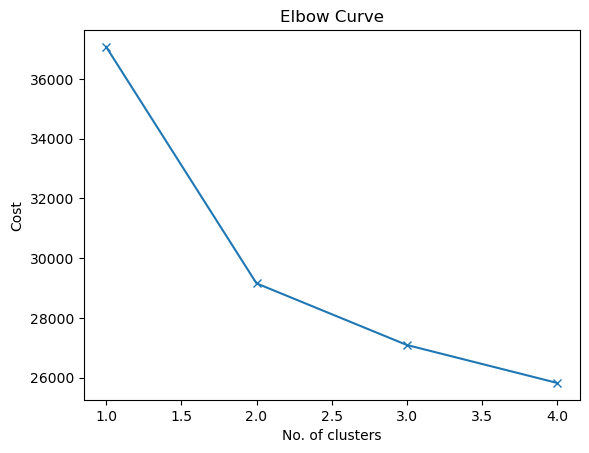

In [17]:
cost = [] 
K = range(1,5) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(hospital_general_information_new) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [18]:
## Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
clusters = kmode.fit_predict(hospital_general_information_new)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 523, cost: 28465.0
Run 1, iteration: 2/100, moves: 0, cost: 28465.0


array([0, 0, 0, ..., 2, 2, 0], dtype=uint16)

In [19]:
hospital_general_information_new.insert(0, "Cluster", clusters, True)
hospital_general_information_new

,Cluster,provider_id,phone_number,hospital_type,hospital_ownership,emergency_services,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,readmission_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison
0,0,10005,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,True,3.0,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average
1,0,10032,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,True,4.0,Same as the National average,Not Available,Same as the National average,Not Available,Same as the National average,Same as the National average,Not Available
2,0,10131,2568823100,Acute Care Hospitals,Proprietary,True,3.0,Below the National average,Above the National average,Same as the National average,Same as the National average,Same as the National average,Same as the National average,Same as the National average
3,0,20001,9072123675,Acute Care Hospitals,Voluntary non-profit - Church,True,3.0,Same as the National average,Below the National average,Above the National average,Below the National average,Below the National average,Below the National average,Same as the National average
4,0,20018,9075436300,Acute Care Hospitals,Tribal,True,3.0,Same as the National average,Not Available,Same as the National average,Below the National average,Below the National average,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,0,501333,5099629841,Critical Access Hospitals,Government - Hospital District or Authority,True,3.0,Same as the National average,Not Available,Same as the National average,Above the National average,Same as the National average,Same as the National average,Same as the National average
4814,1,450827,9406925888,Acute Care Hospitals,Proprietary,True,4.0,Not Available,Above the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Same as the National average
4815,2,501310,5094472441,Critical Access Hospitals,Government - Hospital District or Authority,True,0.0,Not Available,Not Available,Same as the National average,Not Available,Not Available,Not Available,Not Available
4816,2,670107,2142946250,Acute Care Hospitals,Proprietary,True,0.0,Not Available,Not Available,Not Available,Not Available,Not Available,Same as the National average,Not Available


In [20]:
# Count values in column
hospital_general_information_new['Cluster'].value_counts()

Cluster
0    3112
2    1323
1     383
Name: count, dtype: int64

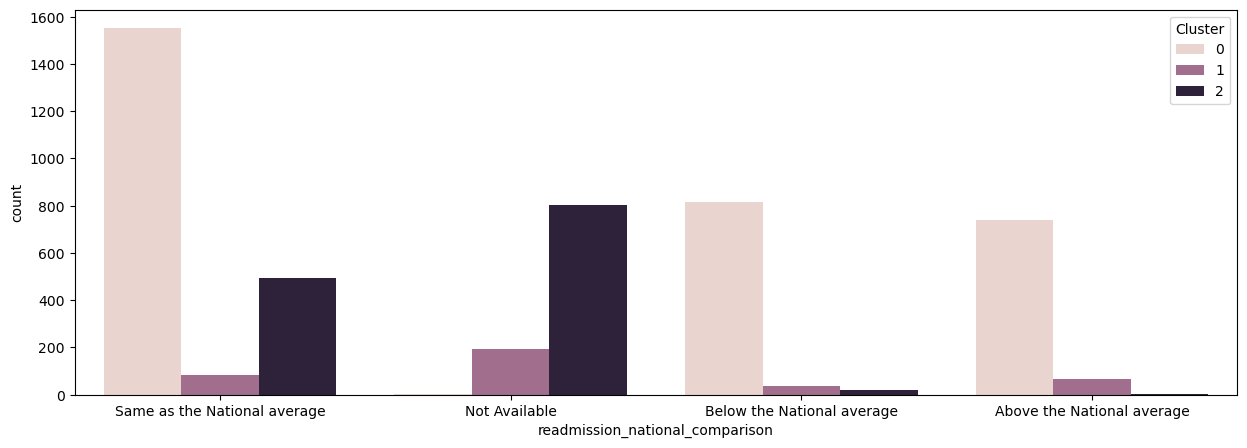

In [21]:
# Readmission comparison
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['readmission_national_comparison'],order=hospital_general_information_new['readmission_national_comparison'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

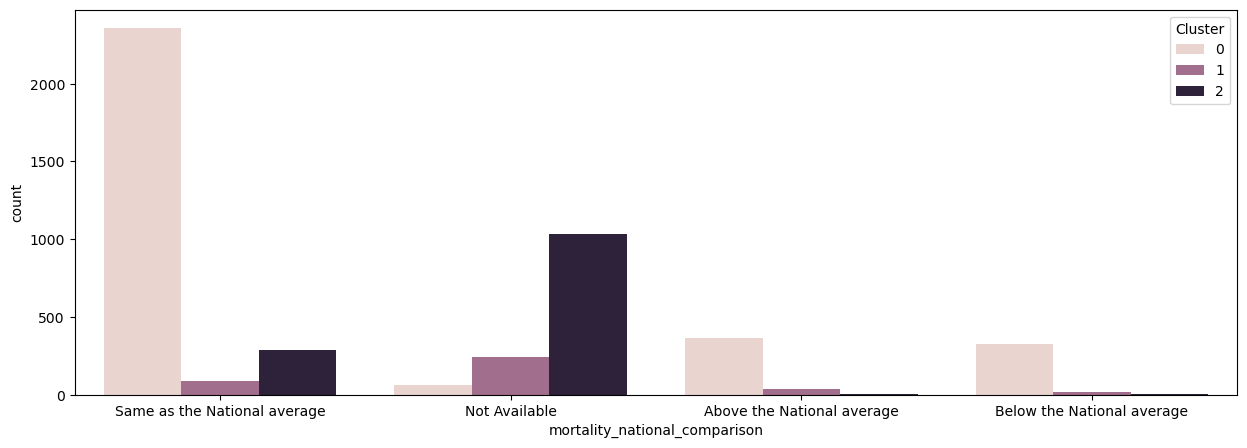

In [22]:
# mortality national comparison
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['mortality_national_comparison'],order=hospital_general_information_new['mortality_national_comparison'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

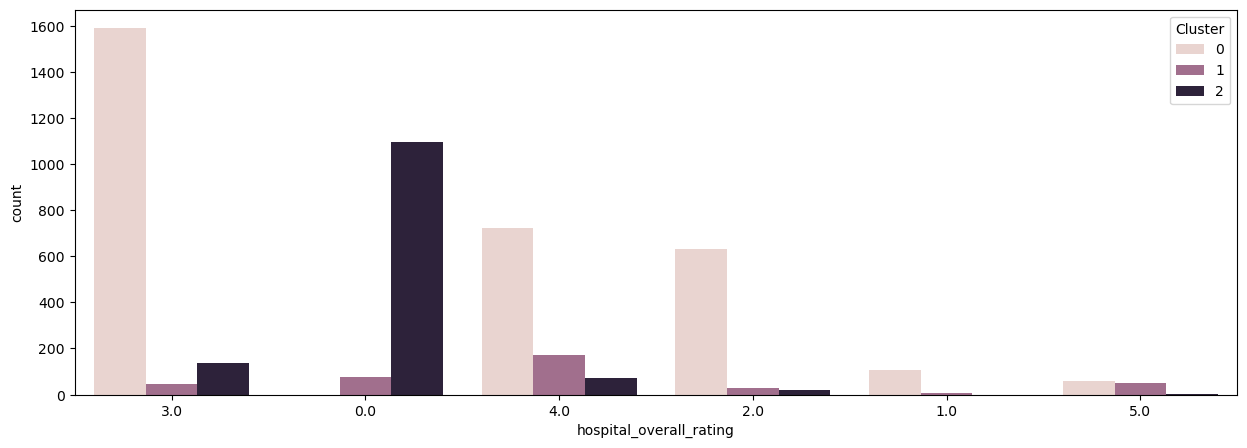

In [23]:
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['hospital_overall_rating'],order=hospital_general_information_new['hospital_overall_rating'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

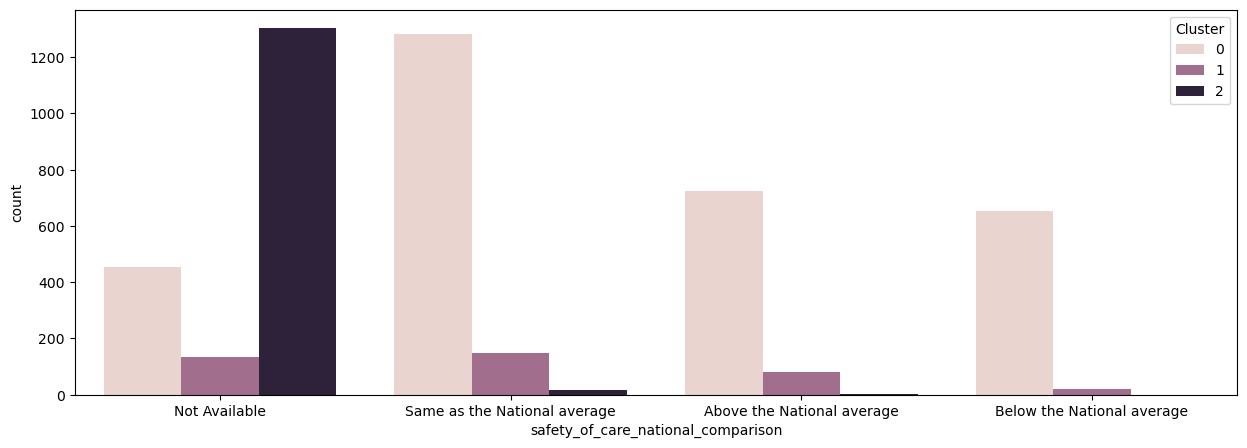

In [24]:
# safety of care national comparison
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['safety_of_care_national_comparison'],order=hospital_general_information_new['safety_of_care_national_comparison'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

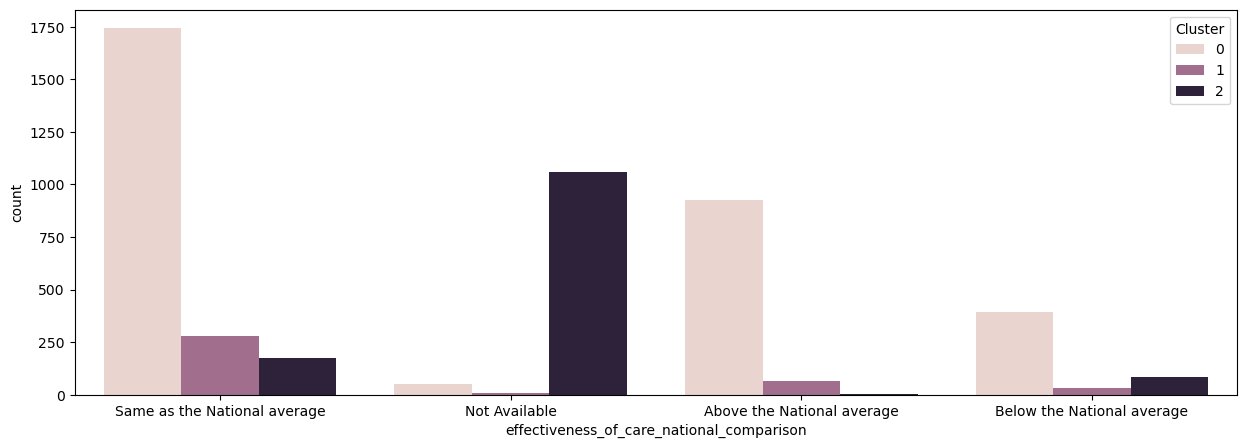

In [25]:
# Effectiveness of care 
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['effectiveness_of_care_national_comparison'],order=hospital_general_information_new['effectiveness_of_care_national_comparison'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

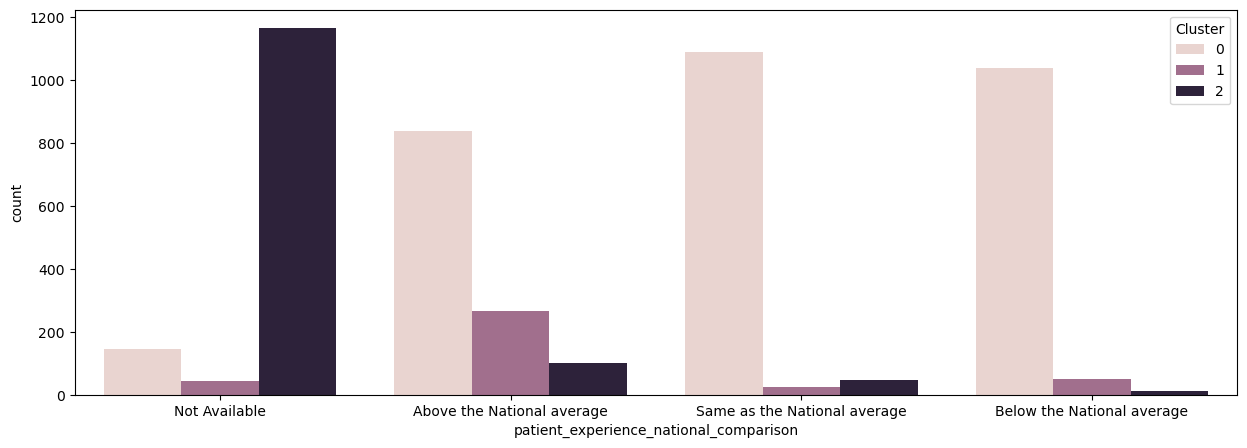

In [26]:
# patient experience national comparison
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['patient_experience_national_comparison'],order=hospital_general_information_new['patient_experience_national_comparison'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

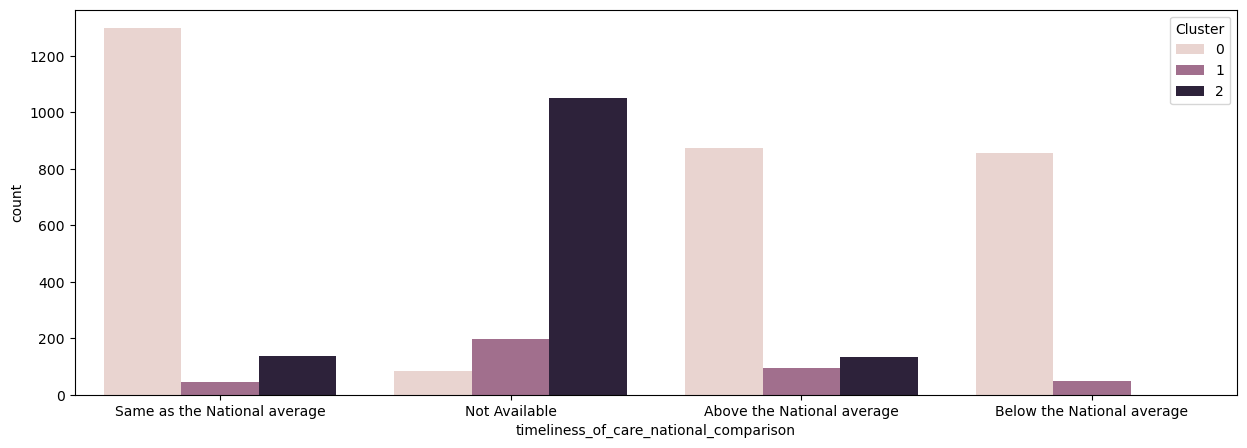

In [27]:
plt.subplots(figsize = (15,5))
sns.countplot(x=hospital_general_information_new['timeliness_of_care_national_comparison'],order=hospital_general_information_new['timeliness_of_care_national_comparison'].value_counts().index,hue=hospital_general_information_new['Cluster'])
plt.show()

##### Observations
Within the "0" cluster, it appears that each column contains the highest average value. 
Furthermore, cluster "1" illustrates that the quality of the hospitals are mostly average or above average. Specifically, hospital ratings are generally higher with a rating of 4 or 5 and timeliness of care, safety of care, effectiveness of care, patient experience are mostly above the national average. Some expections include mortality and readmission rates being higher for this group which is odd. However, not all hospitals reported findings for these columns so the data may be skewed in that aspect. 
Overall, cluster "2" mostly contains the 'Not Available' data points. In the pre-processing phase, I did not remove this as this is useful to know for analysis. 



## Supervised Machine Learning: Regression

In [30]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
# Separate features (X) and target variable (y)
X = hospital_general_information_new[['patient_experience_national_comparison']]
y = hospital_general_information_new['hospital_overall_rating']

In [128]:
X

,patient_experience_national_comparison
0,Same as the National average
1,Not Available
2,Same as the National average
3,Below the National average
4,Below the National average
...,...
4813,Above the National average
4814,Above the National average
4815,Not Available
4816,Not Available


In [130]:
# Split hospital dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Label Encoding:
label_encoder = LabelEncoder()
X_train_label = X_train.copy()
X_train_label['patient_experience_national_comparison'] = label_encoder.fit_transform(X_train_label['patient_experience_national_comparison'])

In [134]:
# Create a regression object 
regression = LinearRegression() 

In [136]:
# Build linear regression model
model_label = regression.fit(X_train_label, y_train)

In [138]:
# Evaluate model on the test set
X_test_label = X_test.copy()
X_test_label['patient_experience_national_comparison'] = label_encoder.transform(X_test_label['patient_experience_national_comparison'])
y_pred_label = model_label.predict(X_test_label)
mse_label = mean_squared_error(y_test, y_pred_label)
print(f"Label Encoding Model - Mean Squared Error: {mse_label}")

Label Encoding Model - Mean Squared Error: 2.0831341436973214


In [140]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test_label)

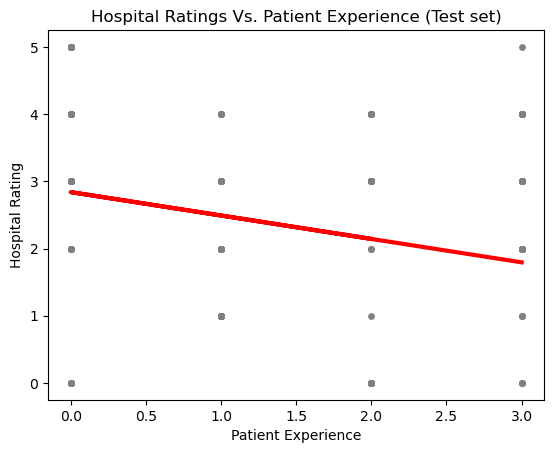

In [142]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_label['patient_experience_national_comparison'], y_test, color='gray', s = 15)
plot_test.plot(X_test_label['patient_experience_national_comparison'], y_predicted, color='red', linewidth =3)
plot_test.title('Hospital Ratings Vs. Patient Experience (Test set)')
plot_test.xlabel('Patient Experience')
plot_test.ylabel('Hospital Rating')
plot_test.show()

In [144]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [146]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.34839876]
Mean squared error:  2.0831341436973214
R2 score:  0.05357256592322979


##### Observations
slope: Indicates a negative relationship meaning if the hospital rating is lower, than the patient experience overall is lower as well. 

Root mean squared error: considering that the numeric value is on the lower end, it can be concluded that the line is a good fit 

R2 Score: Because the number is low, this indicates a poor fit.